# Analiza matematyczna z zastosowaniami 1

## Ćwiczenia w sali komputerowej nr 4

### Przygotowanie do pracy

Uzupełnij poniższą zmienną `IMIE_NAZWISKO` swoim imieniem i nazwiskiem, a następnie ją uruchom - dzięki temu sprawdzisz, czy kernel Pythona działa poprawnie.

In [ ]:
IMIE_NAZWISKO = ""

print(IMIE_NAZWISKO)

Załadujmy niezbędne biblioteki:

In [ ]:
import numpy as np
import pandas as pd
import sympy as sp

import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

Podczas implementacji nie korzystaj z gotowych funkcji SciPy zawartych w module `scipy.integrate` - podczas zajęć będziemy chcieli zaimplementować algorytmy od podstaw. Nie używaj też funkcji `np.trapz()`/`np.trapezoid()`. Pod koniec materiałów pokażemy jak można wykorzystać bibliotekę SciPy do obliczeń całkowania numerycznego.

### Metody całkowania numerycznego cz. 1

W poniższych materiałach zobaczymy w jaki sposób numerycznie obliczyć całkę oznaczoną $I = \int_a^b f(x) \, dx$, tj. dla funkcji $f(x)$ względem zmiennej niezależnej $x$, obliczaną w granicach od $x = a$ do $x = b$. Ponizszy rysunek przedstawia graficzne zobrazowanie tego pojęcia - dla funkcji leżących powyżej osi $x$, całka odpowiada polu pod krzywą funkcji $f(x)$ między $x = a$ a $b$.

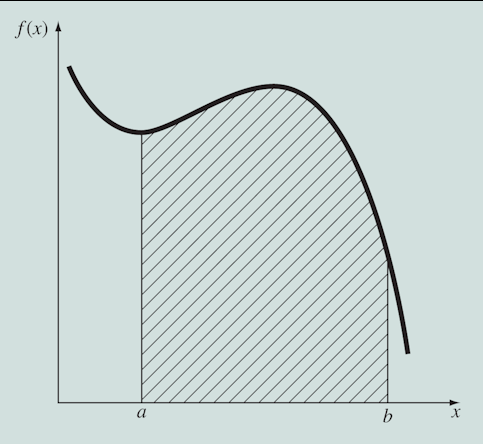

Całkowanie numeryczne bywa czasem nazywane *kwadraturą* - jest to archaiczne określenie, które pierwotnie oznaczało skonstruowanie kwadratu o tej samej powierzchni co dana figura krzywoliniowa. Obecnie termin *kwadratura* jest zazwyczaj traktowany jako synonim numerycznej całki oznaczonej.

Całkowanie ma sporo zastosowań inżynieryjnych i naukowych, które dostarczają wielu konkretnych przykładów ich użycia. Wiele z tych problemów odnosi się bezpośrednio do idei całki jako pola pod krzywą. Poniższy rysunek przedstawia kilka przypadków, w których całkowanie jest wykorzystywane właśnie w tym celu:

a. geodeta może potrzebować obliczyć pole obszaru ograniczonego przez krętą rzekę i dwie drogi.  
b. hydrolog może potrzebować obliczyć pole przekroju poprzecznego rzeki.  
c. inżynier budowlany może potrzebować wyznaczyć siłę netto spowodowaną przez nierównomierny wiatr wiejący w bok wieżowca.

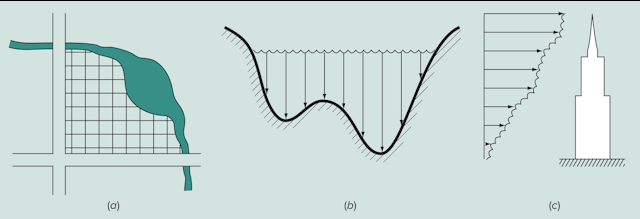

Gdy rozważane funkcje są proste, to zazwyczaj wybierzemy rozwiązanie analityczne. Jednakże często – szczególnie w bardziej realistycznych przykładach – jest to trudne lub wręcz niemożliwe, gdy funkcja jest skomplikowana. Dodatkowo, bardzo często funkcja może być w ogóle nieznana i zdefiniowana jedynie na podstawie pomiarów w dyskretnych punktach. W obu tych przypadkach musimy posiadać umiejętność uzyskiwania przybliżonych wartości całek przy użyciu technik numerycznych. W pierwszej części materiałów skoncentrujemy się właśnie na tym przypadku, gdy dysponujemy tylko pomiarem w dyskretnych punktach.

#### Metoda prostokątów

Najprostszą z metod numerycznego obliczania całki oznaczonej jest metoda prostokątów. Poniższy rysunek przedstawia ogólną ideę:

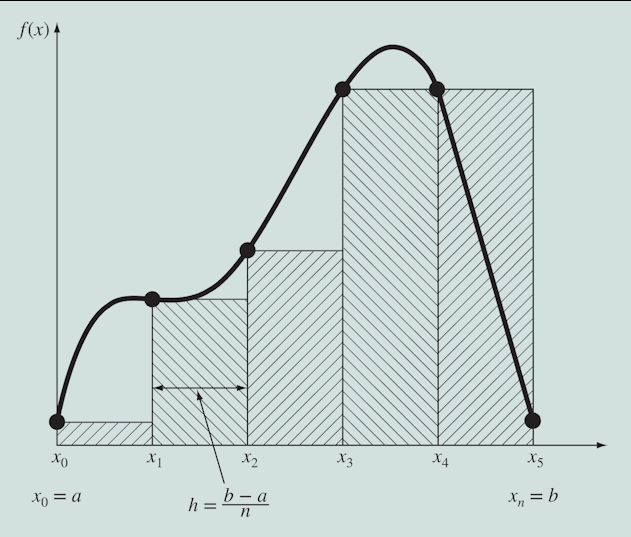

Mamy $n + 1$ jednakowo rozmieszczonych punktów bazowych $(x_0, x_1, x_2, \ldots, x_n)$. W związku z tym, istnieje $n$ przedziałów (segmentów) o równej szerokości:

$$
h = \frac{b - a}{n}
$$

Jeśli $a$ i $b$ zostaną oznaczone jako $x_0$ i $x_n$, całkę można zapisać jako:

$$
I = \int_{x_0}^{x_1} f(x) \, dx + \int_{x_1}^{x_2} f(x) \, dx + \cdots + \int_{x_{n-1}}^{x_n} f(x) \, dx = I_1 + \cdots + I_n
$$

Aby wyliczyć składnik elementarny (pole prostokąta) $I_i$ pomiędzy $x_{i-1}$ a $x_i$, możemy wykorzystać jedną z dwóch metod, przedstawionych na poniższym rysunku, tj. (a) *lewo* lub (b) *prawo*:

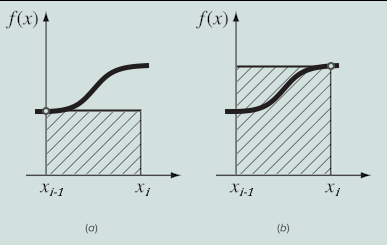

Jako przybliżenie całki oznaczonej $ \int_a^b f(x)\, dx$ można wykorzystać jedną z podanych poniżej sum (odpowiednio dla metody *lewo* i *prawo*):

$$
I = \sum_{i=1}^{n} f(x_{i-1}) h \\
I = \sum_{i=1}^{n} f(x_i) h
$$

**Uwaga**: w materiałach stosujemy oznaczenie zakładające, że dysponujemy jednakowo rozmieszczonymi punktami danych, tj. o równej szerokości przedziałów $h$. W praktyce jednak często zdarzają się sytuacje, w których to założenie nie jest spełnione i musimy pracować z segmentami o nierównej długości (np. dane pochodzące z eksperymentów często mają właśnie taki charakter). W takich przypadkach wystarczy, że w obliczeniach $i$-tego składnika elementarnego $I_i$ użyjemy $h_i$ jako szerokości $i$-tego segmentu, tj. $x_i - x_{i-1}$:

$$
I = \sum_{i=1}^{n} f(x_{i-1}) h_i \\
I = \sum_{i=1}^{n} f(x_i) h_i
$$

##### Zadanie 1 (2 pkt.)

Zaimplementuj poniższą funkcję `rectangle_integral()`. Zwróć uwagę, że pierwszym argumentem jest `y`, a drugim `x` (jest to zgodne z konwencją stosowaną w bibliotece SciPy). Funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu.

Przypadek testowy:

```python
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)

a = 0.0
b = 1.0
n = 10

x = np.linspace(a, b, n+1)
y = f(x)

results = rectangle_integral(y, x, variant='left')
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
    i  x_{i-1}  x_i     I_i     C_i
0   1      0.0  0.1  0.0200  0.0200
1   2      0.1  0.2  0.1289  0.1489
2   3      0.2  0.3  0.1288  0.2777
3   4      0.3  0.4  0.1607  0.4384
4   5      0.4  0.5  0.2456  0.6840
5   6      0.5  0.6  0.3325  1.0165
6   7      0.6  0.7  0.3464  1.3629
7   8      0.7  0.8  0.2363  1.5992
8   9      0.8  0.9  0.0232  1.6224
9  10      0.9  1.0 -0.1519  1.4705
```

In [ ]:
def rectangle_integral(y, x, variant='left'):
    """
    Perform the rectangle method for integral calculation using samples.

    Parameters:
        - y (array of floats): Array of f(x) to be integrated.
        - x (array of floats): The points at which y is sampled.
        - variant (str): The variant of the rectangle method ('left', 'right').

    Returns:
        - dict: A dictionary containing the results of each partial sum. The keys are the following lists:
            - 'i': The rectangle number.
            - 'x_{i-1}': The value of x_{i-1} used in i-th rectangle.
            - 'x_i': The value of x_i used in i-th rectangle.
            - 'I_i': The partial integral sum for a given rectangle.
            - 'C_i': The cumulative integral sum.
    """

    assert len(x) == len(y), "x and y must have the same length."
    assert variant in ('left', 'right'), "Variant must be 'left' or 'right'"

    results = {
        "i": [],
        "x_{i-1}": [],
        "x_i": [],
        "I_i": [],
        "C_i": []
    }
    
    # UMIEŚĆ SWÓJ KOD TUTAJ

    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje działanie algorytmu:

In [ ]:
def show_results_rectangle(f, f_eq, f_sym):
    def plot_rectangle(a, b, n, variant):
        
        rx = np.linspace(a, b, n+1)
        ry = f(rx)
        results = rectangle_integral(ry, rx, variant)
        
        x_margin = np.abs(b - a)*0.05
        x = np.linspace(a-x_margin, b+x_margin, 100)
        y = f(x)
        y_min = np.min(y)
        y_max = np.max(y)
        y_margin = np.abs(y_max - y_min)*0.05

        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x, y, color="black", linewidth=1, linestyle='--', label='True $f(x)$', zorder=2)
        plt.plot(rx, ry, 'o', color="black", label='Sampled $f(x)$', zorder=2)
        plt.axvline(a, color='tab:blue', linewidth=1, linestyle='dotted', label="a", zorder=1)
        plt.axvline(b, color='tab:orange', linewidth=1, linestyle='dotted', label="b", zorder=1)
        
        ax = plt.gca()
        for i in range(n):
            x_l = results["x_{i-1}"][i]
            x_r = results["x_i"][i]
            if variant == "left":
                f_i = ry[i]
            else: # right
                f_i = ry[i+1]
            width = x_r - x_l
            lab = 'Partial $I_i$' if i == 0 else None
            rect = patches.Rectangle((x_l, 0), width, f_i, linewidth=1, edgecolor='tab:red', facecolor=(0.8, 0.2, 0.5, 0.05), label=lab)
            ax.add_patch(rect)
            
        CS = results["C_i"][-1]
        
        int_val = float(sp.integrate(f_sym, (sp.Symbol('x'), a, b)).evalf())
        
        if abs(int_val) < 1e-12:
            err = abs(CS) * 100
        else:
            err = abs((int_val - CS) / int_val) * 100

        title_err = f"{err:.1f}%" if abs(int_val) >= 1e-12 else f"(abs err to 0): {err:.5f}"

        plt.title(f'Rectangle integral method for\n{f_eq}\nNumerical: {CS:.5f} | Symbolic: {int_val:.5f} | Error: {title_err}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))
        plt.xlim(a - x_margin, b + x_margin)
        plt.ylim(y_min - y_margin, y_max + y_margin)
        plt.show()
    
    a_floattext = widgets.FloatText(value=0, step=0.02, description='a:')
    b_floattext = widgets.FloatText(value=1, step=0.02, description='b:')
    n_slider = widgets.IntSlider(min=1, max=30, step=1, value=10, description='n:')
    variant_buttons = widgets.ToggleButtons(options=['left', 'right'], description='Variant:')

    interactive_plot = widgets.interactive(plot_rectangle, a=a_floattext, b=b_floattext, n=n_slider, variant=variant_buttons)
    display(interactive_plot)

In [ ]:
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)
f_eq = '$f(x) = 0.2 + 25x - 200 x^2 + 675 x^3 - 900 x^4 + 400 x^5$'
x = sp.Symbol('x')
f_sym = 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

show_results_rectangle(f, f_eq, f_sym)

#### Metody Newtona-Cotesa

Metody Newtona-Cotesa to najczęściej stosowane schematy całkowania numerycznego, które opierają się na strategii zastąpienia skomplikowanej funkcji lub danych tabelarycznych wielomianem rzędu $n$, który łatwo jest całkować:

$$
I = \int_a^b f(x) \, dx \approx \int_a^b f_n(x) \, dx
$$

gdzie $f_n(x)$ to wielomian postaci

$$
f_n(x) = a_0 + a_1 x + \cdots + a_{n-1} x^{n-1} + a_n x^n
$$

Np. na poniższym rysunku, jako przybliżenie używany jest a) wielomian pierwszego rzędu (linia prosta) lub b) parabola.

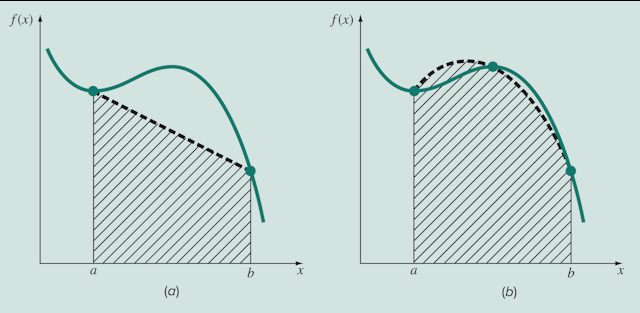

Całkę można również przybliżyć przy użyciu szeregu wielomianów stosowanych odcinkowo do funkcji lub danych na segmentach o stałej długości. Np. na poniższym rysunku użyto trzech odcinków prostych do przybliżenia całki; w tym samym celu można zastosować także wielomiany wyższych rzędów.

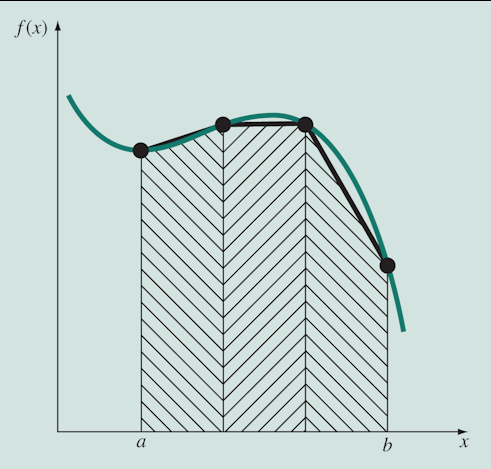

#### Metoda trapezów $(n=1)$

Metoda trapezów odpowiada przypadkowi, w którym wielomian $f_n(x)$ jest rzędu pierwszego:

$$
I = \int_a^b \left[ f(a) + \frac{f(b) - f(a)}{b - a}(x - a) \right] dx
$$

Wynik całkowania wynosi:

$$
I = (b - a) \frac{f(a) + f(b)}{2}
$$

Geometrycznie metoda trapezów odpowiada przybliżeniu pola trapezu pod prostą łączącą $f(a)$ i $f(b)$, tak jak pokazano na poniższym rysunku: 

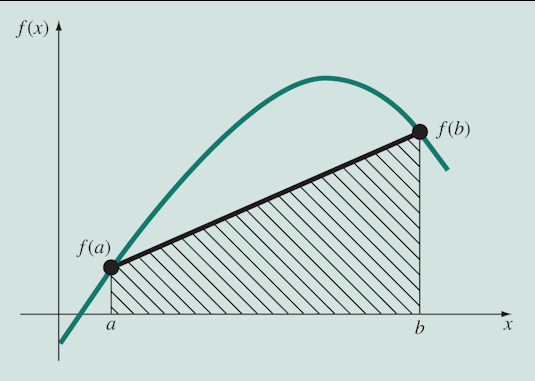

Przypomnijmy, że wzór na pole trapezu to wysokość pomnożona przez średnią długość podstaw. W naszym przypadku koncepcja jest ta sama, lecz trapez jest "położony na boku". Zatem przybliżenie całki można zapisać jako:

$$
I = \text{szerokość} \times \text{średnia wysokość}
$$

czyli

$$
I = (b - a) \times \text{średnia wysokość}
$$

gdzie $\text{średnia wysokość}$ to średnia wartości funkcji na końcach przedziału, czyli:

$$
\frac{f(a) + f(b)}{2}
$$

Jednym ze sposobów na poprawę dokładności reguły trapezów jest podzielenie przedziału całkowania od $a$ do $b$ na kilka segmentów i zastosowanie metody do każdego z nich. Pola poszczególnych segmentów można następnie zsumować, aby uzyskać całkę dla całego przedziału. Otrzymane w ten sposób równania nazywane są **złożonymi** (ang. *composite*) lub **wielosegmentowymi formułami całkowania** (*multiple-segment integration formulas*). Ideę tę ilustruje poniższy rysunek.

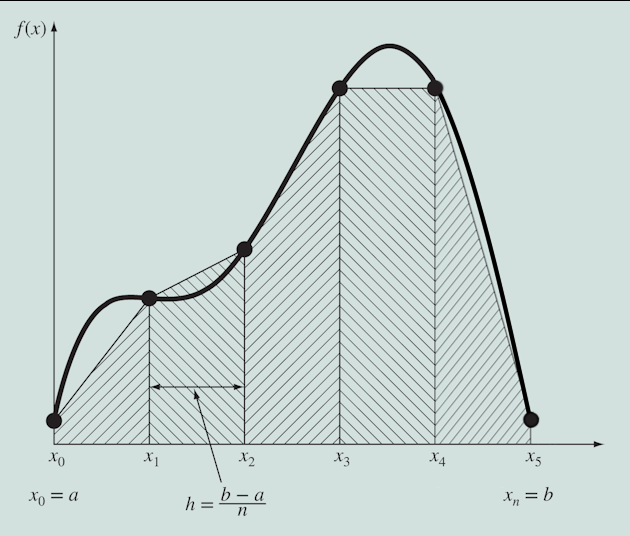

Mamy $n + 1$ jednakowo rozmieszczonych punktów bazowych $(x_0, x_1, x_2, \ldots, x_n)$. W związku z tym, mamy $n$ przedziałów o równej szerokości:

$$
h = \frac{b - a}{n}
$$

Jeśli $a$ i $b$ oznaczymy jako $x_0$ oraz $x_n$, całkę można zapisać jako:

$$
I = \int_{x_0}^{x_1} f(x)\, dx + \int_{x_1}^{x_2} f(x)\, dx + \cdots + \int_{x_{n-1}}^{x_n} f(x)\, dx
$$

Podstawiając metodę trapezów do każdej z całek, otrzymujemy:

$$
I = h \frac{f(x_0) + f(x_1)}{2} + h \frac{f(x_1) + f(x_2)}{2} + \cdots + h \frac{f(x_{n-1}) + f(x_n)}{2}
$$

Grupując wyrazy, uzyskujemy:

$$
I = \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]
$$

lub w ogólnej postaci:

$$
I = \frac{(b - a)}{2n} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]
$$

Ponieważ suma współczynników $f(x)$ w liczniku, podzielona przez $2n$, daje 1, średnia wysokość reprezentuje średnią ważoną wartości funkcji. Jak widać, punkty wewnętrzne mają wagę dwukrotnie większą niż wartości brzegowe $f(x_0)$ i $f(x_n)$.

---

Błąd dla wielosegmentowej metody trapezów można uzyskać, sumując indywidualne błędy dla każdego segmentu:

$$
E_t = -\frac{(b - a)^3}{12n^3} \sum_{i=1}^{n} f''(\xi_i)
$$

gdzie $f''(\xi_i)$ to druga pochodna w punkcie $\xi_i$ znajdującym się w $i$-tym segmencie. Wynik ten można uprościć, szacując średnią wartość drugiej pochodnej dla całego przedziału:

$$
\overline{f''} \approx \frac{1}{n} \sum_{i=1}^{n} f''(\xi_i)
$$

Zatem $\sum f''(\xi_i) \approx n \overline{f''}$, więc:

$$
E_a = -\frac{(b - a)^3}{12n^2} \, \overline{f''}
$$

Zauważmy, że jeśli liczba segmentów zostanie podwojona, to błąd obcięcia zmniejszy się czterokrotnie.

##### Zadanie 2 (2 pkt.)

Zaimplementuj poniższą funkcję `trapezoidal_integral()`. Zwróć uwagę, że pierwszym argumentem jest `y`, a drugim `x` (jest to zgodne z konwencją stosowaną w bibliotece SciPy). Funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu. Pamiętaj, że długości segmentów $h_i$ mogą być różnej długości.

Przypadek testowy:

```python
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)

a = 0.0
b = 1.0
n = 10

x = np.linspace(a, b, n+1)
y = f(x)

results = trapezoidal_integral(y, x)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
    i  x_{i-1}  x_i      I_i      C_i
0   1      0.0  0.1  0.07445  0.07445
1   2      0.1  0.2  0.12885  0.20330
2   3      0.2  0.3  0.14475  0.34805
3   4      0.3  0.4  0.20315  0.55120
4   5      0.4  0.5  0.28905  0.84025
5   6      0.5  0.6  0.33945  1.17970
6   7      0.6  0.7  0.29135  1.47105
7   8      0.7  0.8  0.12975  1.60080
8   9      0.8  0.9 -0.06435  1.53645
9  10      0.9  1.0 -0.06595  1.47050
```

In [ ]:
def trapezoidal_integral(y, x):
    """
    Perform the trapezoidal method for integral calculation of a function.

    Parameters:
        - y (array of floats): Array of f(x) to be integrated.
        - x (array of floats): The points at which y is sampled.
            
    Returns:
        - dict: A dictionary containing the results of each partial sum. The keys are the following lists:
            - 'i': The trapezoid number.
            - 'x_{i-1}': The value of x_{i-1} used in i-th trapezoid.
            - 'x_i': The value of x_i used in i-th trapezoid.
            - 'I_i': The partial integral sum for a given trapezoid.
            - 'C_i': The cumulative integral sum.
    """
    
    assert len(x) == len(y), "x and y must have the same length."

    results = {
        "i": [],
        "x_{i-1}": [],
        "x_i": [],
        "I_i": [],
        "C_i": []
    }
    
    # UMIEŚĆ SWÓJ KOD TUTAJ

    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje działanie algorytmu:

In [ ]:
def show_results_trapezoidal(f, f_eq, f_sym):
    def plot_trapezoidal(a, b, n):
        
        rx = np.linspace(a, b, n+1)
        ry = f(rx)
        results = trapezoidal_integral(ry, rx)
        
        x_margin = np.abs(b - a)*0.05
        x = np.linspace(a-x_margin, b+x_margin, 100)
        y = f(x)
        y_min = np.min(y)
        y_max = np.max(y)
        y_margin = np.abs(y_max - y_min)*0.05

        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x, y, color="black", linewidth=1, linestyle='--', label='True $f(x)$', zorder=2)
        plt.plot(rx, ry, 'o', color="black", label='Sampled $f(x)$', zorder=2)
        plt.axvline(a, color='tab:blue', linewidth=1, linestyle='dotted', label="a", zorder=1)
        plt.axvline(b, color='tab:orange', linewidth=1, linestyle='dotted', label="b", zorder=1)
        
        ax = plt.gca()
        for i in range(n):
            x_l = results["x_{i-1}"][i]
            x_r = results["x_i"][i]
            y_l = ry[i]
            y_r = ry[i+1]

            t_x = [x_l, x_l, x_r, x_r]
            t_y = [0,   y_l, y_r, 0]
            lab = 'Partial $I_i$' if i == 0 else None
            trap = patches.Polygon(xy=list(zip(t_x, t_y)), linewidth=1, edgecolor='tab:red', facecolor=(0.8, 0.2, 0.5, 0.05), label=lab)
            ax.add_patch(trap)
            
        CS = results["C_i"][-1]
        
        int_val = float(sp.integrate(f_sym, (sp.Symbol('x'), a, b)).evalf())
        
        if abs(int_val) < 1e-12:
            err = abs(CS) * 100
        else:
            err = abs((int_val - CS) / int_val) * 100

        title_err = f"{err:.1f}%" if abs(int_val) >= 1e-12 else f"(abs err to 0): {err:.5f}"

        plt.title(f'Trapezoidal integral method for\n{f_eq}\nNumerical: {CS:.5f} | Symbolic: {int_val:.5f} | Error: {title_err}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))
        plt.xlim(a - x_margin, b + x_margin)
        plt.ylim(y_min - y_margin, y_max + y_margin)
        plt.show()
    
    a_floattext = widgets.FloatText(value=0, step=0.02, description='a:')
    b_floattext = widgets.FloatText(value=1, step=0.02, description='b:')
    n_slider = widgets.IntSlider(min=1, max=30, step=1, value=10, description='n:')

    interactive_plot = widgets.interactive(plot_trapezoidal, a=a_floattext, b=b_floattext, n=n_slider)
    display(interactive_plot)

In [ ]:
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)
f_eq = '$f(x) = 0.2 + 25x - 200 x^2 + 675 x^3 - 900 x^4 + 400 x^5$'
x = sp.Symbol('x')
f_sym = 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

show_results_trapezoidal(f, f_eq, f_sym)

#### Metoda Simpsona 1/3 $(n=2)$

Innym sposobem uzyskania dokładniejszego oszacowania całki jest użycie wielomianów wyższych rzędów do połączenia punktów. Np., jeśli pomiędzy $f(a)$ a $f(b)$ znajduje się dodatkowy punkt pośredni, to te trzy punkty można połączyć parabolą. Z kolei jeśli pomiędzy $f(a)$ a $f(b)$ znajdują się dwa rozmieszczone punkty, to te cztery punkty można połączyć wielomianem trzeciego rzędu. Formuły wynikające z całkowania pod takimi wielomianami nazywane są metodą Simpsona. Poniższy rysunek przedstawia idee metody Simpsona odpowiednio a) 1/3 i b) 3/8 (w dalszej części materiałów wyjaśnimy skąd pochodzą te nazwy).

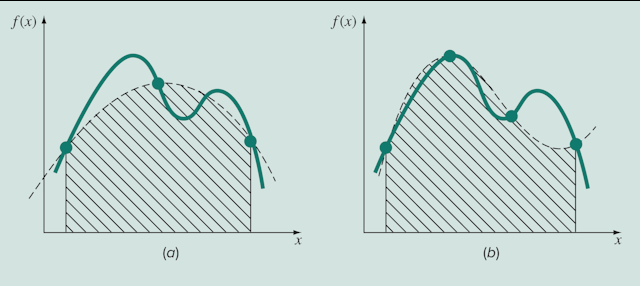

Metoda Simpsona 1/3 odpowiada przypadkowi, gdy wielomian $f_n(x)$ jest rzędu drugiego:

$$
I = \int_{x_0}^{x_2} \left[
\frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} f(x_0)
+ \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} f(x_1)
+ \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} f(x_2)
\right] dx
$$

gdzie $a = x_0$, $b = x_2$. Wynik całkowania to:

$$
I = \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right]
$$

gdzie w tym przypadku $h = \frac{b - a}{2}$. Równanie to znane jest jako metoda Simpsona 1/3, a nazwa "1/3" pochodzi od faktu, że $h$ jest dzielone przez 3 w powyższym równaniu.

Metodę Simpsona 1/3 można również zapisać w postaci:

$$
I = \frac{(b - a)}{6} \left[ f(x_0) + 4f(x_1) + f(x_2) \right]
$$

gdzie $a = x_0$, $b = x_2$, a $x_1$ to punkt pośredni pomiędzy $a$ i $b$, czyli $\frac{a + b}{2}$. Zauważmy, że punkt środkowy ma wagę 4 (czyli 2/3), a punkty końcowe wagę 1 (czyli 1/6).

---

Można pokazać, że jednosegmentowe zastosowanie metody Simpsona 1/3 ma błąd obcięcia:

$$
E_t = -\frac{1}{90} h^5 f^{(4)}(\xi)
$$

lub, ponieważ $h = \frac{b - a}{2}$:

$$
E_t = -\frac{(b - a)^5}{2880} f^{(4)}(\xi) \tag{19.24}
$$

gdzie $\xi$ leży gdzieś w przedziale od $a$ do $b$. Zatem metoda Simpsona 1/3 jest dokładniejsza niż reguła trapezów. Jednakże porównanie z metodą trapezów wskazuje, że jest ona dokładniejsza, niż można by się spodziewać. Zamiast być proporcjonalnym do trzeciej pochodnej, błąd jest proporcjonalny do czwartej pochodnej. W związku z tym reguła Simpsona 1/3 ma dokładność rzędu trzeciego, mimo że opiera się tylko na trzech punktach. Innymi słowy, daje dokładne wyniki dla wielomianów trzeciego stopnia, mimo że jest wyprowadzona z paraboli.

---

Podobnie jak w przypadku reguły trapezów, metoda Simpsona może zostać ulepszona przez podzielenie przedziału całkowania na liczbę segmentów o równej szerokości. Łączna całka może być wtedy przedstawiona jako:

$$
I = \int_{x_0}^{x_2} f(x)\, dx + \int_{x_2}^{x_4} f(x)\, dx + \cdots + \int_{x_{n-2}}^{x_n} f(x)\, dx \tag{19.25}
$$

Podstawiając metodę Simpsona 1/3 do każdej całki, otrzymujemy:

$$
I = \frac{2h}{6} \left[ f(x_0) + 4f(x_1) + f(x_2) \right]
+ \frac{2h}{6} \left[ f(x_2) + 4f(x_3) + f(x_4) \right]
+ \cdots + \frac{2h}{6} \left[ f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right]
$$

lub:

$$
I = \frac{(b - a)}{3n} \left[
f(x_0)
+ 4 \sum_{\substack{i=1 \\ i \text{ nieparzyste}}}^{n-1} f(x_i)
+ 2 \sum_{\substack{j=2 \\ j \text{ parzyste}}}^{n-2} f(x_j)
+ f(x_n)
\right] \tag{19.26}
$$

Do zastosowania tej metody liczba przedziałów między punktami musi być parzysta. Dodatkowo współczynniki "4" i "2" mogą wydawać się początkowo dziwne, ale wynikają one naturalnie z metody Simpsona 1/3. Na poniższym rysunku (wagi względne są przedstawione nad wartościami funkcji) punkty nieparzyste reprezentują środkowy wyraz, dlatego mają wagę 4, natomiast punkty parzyste są wspólne dla sąsiednich przedziałów, więc są zliczane dwukrotnie.

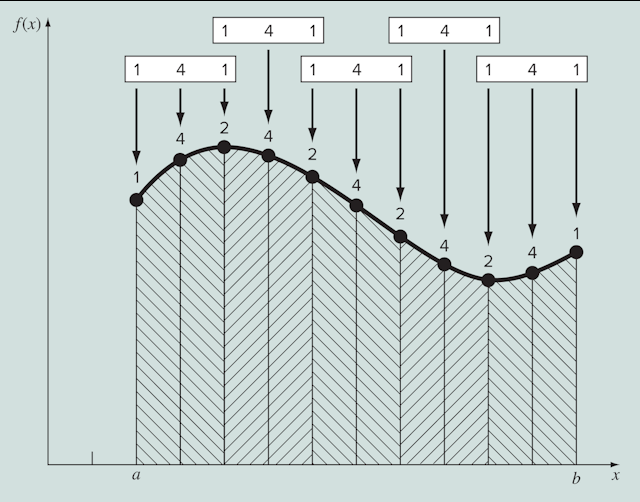

---

Szacowanie błędu dla wielosegmentowej metody Simpsona odbywa się w ten sam sposób, jak dla reguły trapezów, tj. przez sumowanie błędów dla każdego segmentu i uśrednianie pochodnej. Otrzymujemy:

$$
E_a = -\frac{(b - a)^5}{180n^4} \, \overline{f^{(4)}} \tag{19.27}
$$

gdzie $\overline{f^{(4)}}$ oznacza średnią czwartą pochodną na całym przedziale.

W większości zastosowań wielosegmentowa wersja metoda Simpsona 1/3 jest uznawana za lepszą od reguły trapezów.

##### Zadanie 3 (2 pkt.)

Zaimplementuj poniższą funkcję `simpson13_integral()`. Zwróć uwagę, że pierwszym argumentem jest `y`, a drugim `x` (jest to zgodne z konwencją stosowaną w bibliotece SciPy). Funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu. Pamiętaj, że długości segmentów $h_i$ mogą być różnej długości.

Przypadek testowy:

```python
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)

a = 0.0
b = 1.0
n = 11

x = np.linspace(a, b, n)
y = f(x)

results = simpson13_integral(y, x)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
   i  x_{i-1}  x_i  x_{i+1}       I_i       C_i
0  1      0.0  0.1      0.2  0.221467  0.221467
1  2      0.2  0.3      0.4  0.339067  0.560533
2  3      0.4  0.5      0.6  0.640667  1.201200
3  4      0.6  0.7      0.8  0.438267  1.639467
4  5      0.8  0.9      1.0 -0.188133  1.451333
```

In [ ]:
def simpson13_integral(y, x):
    """
    Perform the Simpson's 1/3 rule for integral calculation of a function.

    Parameters:
        - y (array of floats): Array of f(x) to be integrated.
        - x (array of floats): The points at which y is sampled.
            
    Returns:
        - dict: A segment containing the results of each partial sum. The keys are the following lists:
            - 'i': The segment number.
            - 'x_{i-1}': The value of x_{i-1} used in i-th segment.
            - 'x_i': The value of x_i used in i-th segment.
            - 'x_{i+1}': The value of x_i used in i-th segment.
            - 'I_i': The partial integral sum for a given segment.
            - 'C_i': The cumulative integral sum.
    """

    assert len(x) == len(y), "x and y must have the same length."
    assert len(x) % 2 == 1, "The number of sampled points must be odd."

    results = {
        "i": [],
        "x_{i-1}": [],
        "x_i": [],
        "x_{i+1}": [],
        "I_i": [],
        "C_i": []
    }
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
        
    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje działanie algorytmu:

In [ ]:
def show_results_simpson13(f, f_eq, f_sym):
    def plot_simpson13(a, b, n):
        
        rx = np.linspace(a, b, n)
        ry = f(rx)
        results = simpson13_integral(ry, rx)
        
        x_margin = np.abs(b - a)*0.05
        x = np.linspace(a-x_margin, b+x_margin, 100)
        y = f(x)
        y_min = np.min(y)
        y_max = np.max(y)
        y_margin = np.abs(y_max - y_min)*0.05

        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x, y, color="black", linewidth=1, linestyle='--', label='True $f(x)$', zorder=2)
        plt.plot(rx, ry, 'o', color="black", label='Sampled $f(x)$', zorder=2)
        plt.axvline(a, color='tab:blue', linewidth=1, linestyle='dotted', label="a", zorder=1)
        plt.axvline(b, color='tab:orange', linewidth=1, linestyle='dotted', label="b", zorder=1)
        
        ax = plt.gca()
        
        s = (len(rx) - 1) // 2  # number of segments
        
        for i in range(s):           
            x0 = results["x_{i-1}"][i]
            x1 = results["x_i"][i]
            x2 = results["x_{i+1}"][i]
            y0 = ry[2*i]
            y1 = ry[2*i+1]
            y2 = ry[2*i+2]

            L = lambda x: (x - x1) * (x - x2) / ( (x0 - x1)*(x0 - x2) ) * y0 +\
                          (x - x0) * (x - x2) / ( (x1 - x0)*(x1 - x2) ) * y1 +\
                          (x - x0) * (x - x1) / ( (x2 - x0)*(x2 - x1) ) * y2
            
            x_quad = np.linspace(x0, x2, 100)
            y_quad = L(x_quad)
            
            lab = 'Partial $I_i$' if i == 0 else None
            
            t_x = np.concatenate(([x0], x_quad, [x2]))
            t_y = np.concatenate(([0], y_quad, [0]))
            polygon = patches.Polygon(
                xy=list(zip(t_x, t_y)),
                closed=True,
                facecolor='tab:red',
                edgecolor='tab:red',
                alpha=0.2,
                label=lab
            )
            ax.add_patch(polygon)
            
        CS = results["C_i"][-1]
        
        int_val = float(sp.integrate(f_sym, (sp.Symbol('x'), a, b)).evalf())
        
        if abs(int_val) < 1e-12:
            err = abs(CS) * 100
        else:
            err = abs((int_val - CS) / int_val) * 100

        title_err = f"{err:.1f}%" if abs(int_val) >= 1e-12 else f"(abs err to 0): {err:.5f}"

        plt.title(f'Simpson 1/3 integral method for\n{f_eq}\nNumerical: {CS:.5f} | Symbolic: {int_val:.5f} | Error: {title_err}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))
        plt.xlim(a - x_margin, b + x_margin)
        plt.ylim(y_min - y_margin, y_max + y_margin)
        plt.show()
    
    a_floattext = widgets.FloatText(value=0, step=0.02, description='a:')
    b_floattext = widgets.FloatText(value=1, step=0.02, description='b:')
    n_slider = widgets.IntSlider(min=3, max=31, step=2, value=11, description='n:')

    interactive_plot = widgets.interactive(plot_simpson13, a=a_floattext, b=b_floattext, n=n_slider)
    display(interactive_plot)

In [ ]:
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)
f_eq = '$f(x) = 0.2 + 25x - 200 x^2 + 675 x^3 - 900 x^4 + 400 x^5$'
x = sp.Symbol('x')
f_sym = 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

show_results_simpson13(f, f_eq, f_sym)

#### Metoda Simpsona 3/8 $(n=3)$

Możemy pójść dalej, tj. dopasować wielomian $f_n(x)$ trzeciego rzędu do czterech punktów i scałkować go, otrzymując:

$$
I = \frac{3h}{8} \left[ f(x_0) + 3f(x_1) + 3f(x_2) + f(x_3) \right]
$$

gdzie $h = \frac{b - a}{3}$. Powyższe równanie znane jest jako metoda Simpsona 3/8, ponieważ $h$ jest mnożone przez $\frac{3}{8}$. Metodę tę można także zapisać w postaci:

$$
I = \frac{(b - a)}{8} \left[ f(x_0) + 3f(x_1) + 3f(x_2) + f(x_3) \right]
$$

Zatem dwa punkty wewnętrzne mają wagę $\frac{3}{8}$, natomiast punkty końcowe mają wagę $\frac{1}{8}$.  

---

Metoda Simpsona 3/8 ma błąd obcięcia:

$$
E_t = -\frac{3}{80} h^5 f^{(4)}(\xi)
$$

lub, ponieważ $h = \frac{b - a}{3}$:

$$
E_t = -\frac{(b - a)^5}{6480} f^{(4)}(\xi) 
$$

Ponieważ mianownik jest tym razem większy niż w przypadku metody 1/3, metoda 3/8 jest nieco dokładniejsza niż metoda 1/3.

---

Metoda Simpsona 1/3 jest zazwyczaj preferowaną metodą, ponieważ osiąga dokładność trzeciego rzędu przy użyciu trzech punktów, podczas gdy wersja 3/8 wymaga czterech punktów.  
Zwróćmy uwagę, że metoda 3/8 jest przydatna, gdy liczba segmentów jest nieparzysta. 

Załóżmy teraz, że chcemy oszacować całkę dla pięciu segmentów. Jedną z opcji byłoby użycie złożonej wersji reguły trapezów, ale nie jest to zalecane ze względu na duży błąd obcięcia związany z tą metodą. Lepszą alternatywą byłoby zastosowanie reguły Simpsona 1/3 do pierwszych dwóch segmentów, a reguły Simpsona 3/8 do ostatnich trzech, tak jak pokazano to na poniższym rysunku. W ten sposób możemy uzyskać oszacowanie z dokładnością trzeciego rzędu na całym przedziale.

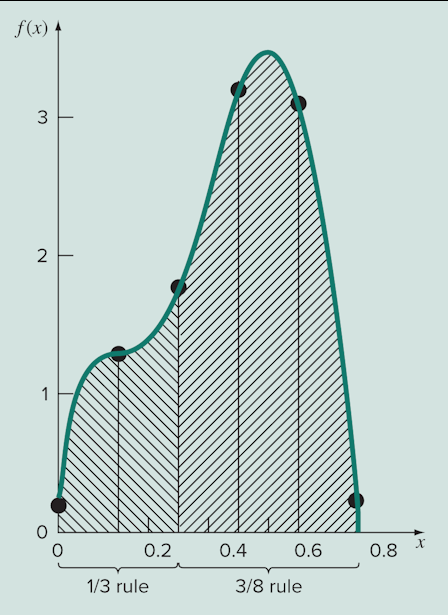

##### Zadanie 4 (2 pkt.)

Zaimplementuj poniższą funkcję `simpson38_integral()`. Zwróć uwagę, że pierwszym argumentem jest `y`, a drugim `x` (jest to zgodne z konwencją stosowaną w bibliotece SciPy). Funkcja ma zwrócić nie tylko wynik końcowy, ale również wartości pośrednie i pomocnicze podczas wykonywania poszczególnych iteracji algorytmu. Pamiętaj, że długości segmentów $h_i$ mogą być różnej długości.

Przypadek testowy:

```python
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)

a = 0.0
b = 1.0
n = 10

x = np.linspace(a, b, n)
y = f(x)

results = simpson38_integral(y, x)
print(pd.DataFrame(results))
```

Oczekiwany wynik:

```plaintext
   i   x_{i-1}       x_i   x_{i+1}   x_{i+2}       I_i       C_i
0  1  0.000000  0.111111  0.222222  0.333333  0.411825  0.411825
1  2  0.333333  0.444444  0.555556  0.666667  0.999261  1.411086
2  3  0.666667  0.777778  0.888889  1.000000  0.043487  1.454572
```

In [ ]:
def simpson38_integral(y, x):
    """
    Perform the Simpson's 3/8 rule for integral calculation of a function.

    Parameters:
        - y (array of floats): Array of f(x) to be integrated.
        - x (array of floats): The points at which y is sampled.
            
    Returns:
        - dict: A segment containing the results of each partial sum. The keys are the following lists:
            - 'i': The segment number.
            - 'x_{i-1}': The value of x_{i-1} used in i-th segment.
            - 'x_i': The value of x_i used in i-th segment.
            - 'x_{i+1}': The value of x_{i+1} used in i-th segment.
            - 'x_{i+2}': The value of x_{i+2} used in i-th segment.
            - 'I_i': The partial integral sum for a given segment.
            - 'C_i': The cumulative integral sum.
    """

    assert len(x) == len(y), "x and y must have the same length."
    assert (len(x) - 1) % 3 == 0, "The number of sampled points must be 3n + 1 for Simpson's 3/8 rule."

    results = {
        "i": [],
        "x_{i-1}": [],
        "x_i": [],
        "x_{i+1}": [],
        "x_{i+2}": [],
        "I_i": [],
        "C_i": []
    }
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
        
    return results

Po zaimplementowaniu możemy skorzystać z poniżego kodu pomocniczego, który wizualizuje działanie algorytmu:

In [ ]:
def show_results_simpson38(f, f_eq, f_sym):
    def plot_simpson38(a, b, n):
        
        rx = np.linspace(a, b, n)
        ry = f(rx)
        results = simpson38_integral(ry, rx)
        
        x_margin = np.abs(b - a)*0.05
        x = np.linspace(a-x_margin, b+x_margin, 100)
        y = f(x)
        y_min = np.min(y)
        y_max = np.max(y)
        y_margin = np.abs(y_max - y_min)*0.05

        plt.figure(figsize=(10, 8))
        plt.axhline(0, color='black', linewidth=0.5, zorder=1)
        plt.plot(x, y, color="black", linewidth=1, linestyle='--', label='True $f(x)$', zorder=2)
        plt.plot(rx, ry, 'o', color="black", label='Sampled $f(x)$', zorder=2)
        plt.axvline(a, color='tab:blue', linewidth=1, linestyle='dotted', label="a", zorder=1)
        plt.axvline(b, color='tab:orange', linewidth=1, linestyle='dotted', label="b", zorder=1)
        
        ax = plt.gca()
        
        s = (len(rx) - 1) // 3  # number of segments
        
        for i in range(s):           
            x0 = results["x_{i-1}"][i]
            x1 = results["x_i"][i]
            x2 = results["x_{i+1}"][i]
            x3 = results["x_{i+2}"][i]
            y0 = ry[3*i]
            y1 = ry[3*i+1]
            y2 = ry[3*i+2]
            y3 = ry[3*i+3]

            L = lambda x: \
                y0 * (x - x1)*(x - x2)*(x - x3) / ((x0 - x1)*(x0 - x2)*(x0 - x3)) + \
                y1 * (x - x0)*(x - x2)*(x - x3) / ((x1 - x0)*(x1 - x2)*(x1 - x3)) + \
                y2 * (x - x0)*(x - x1)*(x - x3) / ((x2 - x0)*(x2 - x1)*(x2 - x3)) + \
                y3 * (x - x0)*(x - x1)*(x - x2) / ((x3 - x0)*(x3 - x1)*(x3 - x2))
            
            x_quad = np.linspace(x0, x3, 100)
            y_quad = L(x_quad)
            
            lab = 'Partial $I_i$' if i == 0 else None
            
            t_x = np.concatenate(([x0], x_quad, [x3]))
            t_y = np.concatenate(([0], y_quad, [0]))
            polygon = patches.Polygon(
                xy=list(zip(t_x, t_y)),
                closed=True,
                facecolor='tab:red',
                edgecolor='tab:red',
                alpha=0.2,
                label=lab
            )
            ax.add_patch(polygon)
            
        CS = results["C_i"][-1]
        
        int_val = float(sp.integrate(f_sym, (sp.Symbol('x'), a, b)).evalf())
        
        if abs(int_val) < 1e-12:
            err = abs(CS) * 100
        else:
            err = abs((int_val - CS) / int_val) * 100

        title_err = f"{err:.1f}%" if abs(int_val) >= 1e-12 else f"(abs err to 0): {err:.5f}"

        plt.title(f'Simpson 3/8 integral method for\n{f_eq}\nNumerical: {CS:.5f} | Symbolic: {int_val:.5f} | Error: {title_err}')
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.legend(prop=FontProperties(family='monospace'), loc='upper left', bbox_to_anchor=(1, 1))
        plt.xlim(a - x_margin, b + x_margin)
        plt.ylim(y_min - y_margin, y_max + y_margin)
        plt.show()
    
    a_floattext = widgets.FloatText(value=0, step=0.02, description='a:')
    b_floattext = widgets.FloatText(value=1, step=0.02, description='b:')
    n_slider = widgets.IntSlider(min=4, max=31, step=3, value=10, description='n:') # 3n+1

    interactive_plot = widgets.interactive(plot_simpson38, a=a_floattext, b=b_floattext, n=n_slider)
    display(interactive_plot)

In [ ]:
f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)
f_eq = '$f(x) = 0.2 + 25x - 200 x^2 + 675 x^3 - 900 x^4 + 400 x^5$'
x = sp.Symbol('x')
f_sym = 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

show_results_simpson38(f, f_eq, f_sym)

#### Biblioteka SciPy

W bibliotece SciPy zaimplementowane algorytmy znajdują się w module [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html). Z omawianych metod mamy dostępne [`scipy.integrate.trapezoid()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html) i [`scipy.integrate.simpson()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html) wraz z ich wersjami zwracającymi wartości narastająco, tj. [`scipy.integrate.cumulative_trapezoid()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html) i [`scipy.integrate.cumulative_simpson()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_simpson.html). Od wersji [1.14.0](https://docs.scipy.org/doc/scipy-1.13.1/reference/generated/scipy.integrate.simpson.html) metoda Simpsona używa wersji 1/3 z drobnymi poprawkami.

Poniżej mamy przykładowe użycie:

In [ ]:
from scipy import integrate

f = lambda x: 0.2 + 25 * x - 200 * np.power(x, 2) + 675 * np.power(x, 3) - 900 * np.power(x, 4) + 400 * np.power(x, 5)

a = 0.0
b = 1.0
n = 10

x = np.linspace(a, b, n)
y = f(x)

print(integrate.trapezoid(y, x))
print(integrate.cumulative_trapezoid(y, x))

##### Zadanie 5 (2 pkt.)

W inżynierii systemów przepływowych (np. rurociągów, kanałów nawadniających, układów chłodzenia) kluczowe znaczenie ma wiedza o całkowitej ilości cieczy, która przepłynęła przez dany odcinek w określonym czasie. Te informacje są niezbędne m.in. do:

* wystawiania faktur za dostarczone medium (np. woda, gaz, chemikalia),
* rozliczeń w systemach przemysłowych (np. przesył etylenu między zakładami chemicznymi),
* optymalizacji zużycia w systemach nawadniających.

Pomiar przepływu (*flow totalization*) w praktyce sprowadza się do numerycznego obliczenia całki z chwilowego przepływu względem czasu, czyli $V = \int_{a}^{b} Q(t) \, dt$, gdzie $ Q(t) $ to przepływ w funkcji czasu, a $ V $ to całkowita objętość cieczy.

Jako programista w zespole automatyki przemysłowej, masz za zadanie stworzyć moduł, który na podstawie dyskretnego wektora pomiarów przepływu i odpowiadających im czasów, oszacuje całkowitą objętość cieczy wykorzystując numeryczne całkowanie metodą Simpsona z biblioteki SciPy.

W tabeli poniżej przedstawiono zmierzone wartości przepływu wody (w m³/s), przesyłanej przez kanał nawadniający do gospodarstwa rolnego w ciągu 24 godzin. Pomiar wykonywany był co 4 godziny.

| Czas (h)        | 0    | 4    | 8    | 12   | 16   | 20   | 24   |
|-----------------|------|------|------|------|------|------|------|
| Przepływ (m³/s) | 0.906 | 0.595 | 1.331 | 1.841 | 1.218 | 2.095 | 0.538 |

Wynik zapisz w zmiennej `vtotal`.

W swoim rozwiązaniu możesz wypisać wynik na standardowe wyjście.

In [ ]:
# UMIEŚĆ SWÓJ KOD TUTAJ

----

Literatura:

* S. Chapra, & D. Clough (2022). _Applied Numerical Methods with Python for Engineers and Scientists_. McGraw Hill.
* S. Rosłoniec (2020). _Wybrane metody numeryczne z przykładami zastosowań w zadaniach inżynierskich_. Wyd. 3, Oficyna Wydawnicza Politechniki Warszawskiej.